In [1]:
!nvidia-smi

Sat Nov 30 19:51:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from PIL import Image
import requests

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [6]:
from google.colab import userdata

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dZvN0FZAZF3VuaVNLn2R")
project = rf.workspace("pasan-7ygjw").project("lateral-neck")
version = project.version(11)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to lateral-neck-11 in yolov11:: 100%|██████████| 620/620 [00:00<00:00, 7870.95it/s]


In [8]:
%cd {HOME}

/content


In [9]:
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

100% 18.4M/18.4M [00:00<00:00, 206MB/s]
Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/lateral-neck-11/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

In [10]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	 train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1732996732.8a8682578290.2512.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1260.jpg  val_batch1_pred.jpg
labels.jpg					    train_batch1261.jpg  weights
P_curve.png					    train_batch1262.jpg


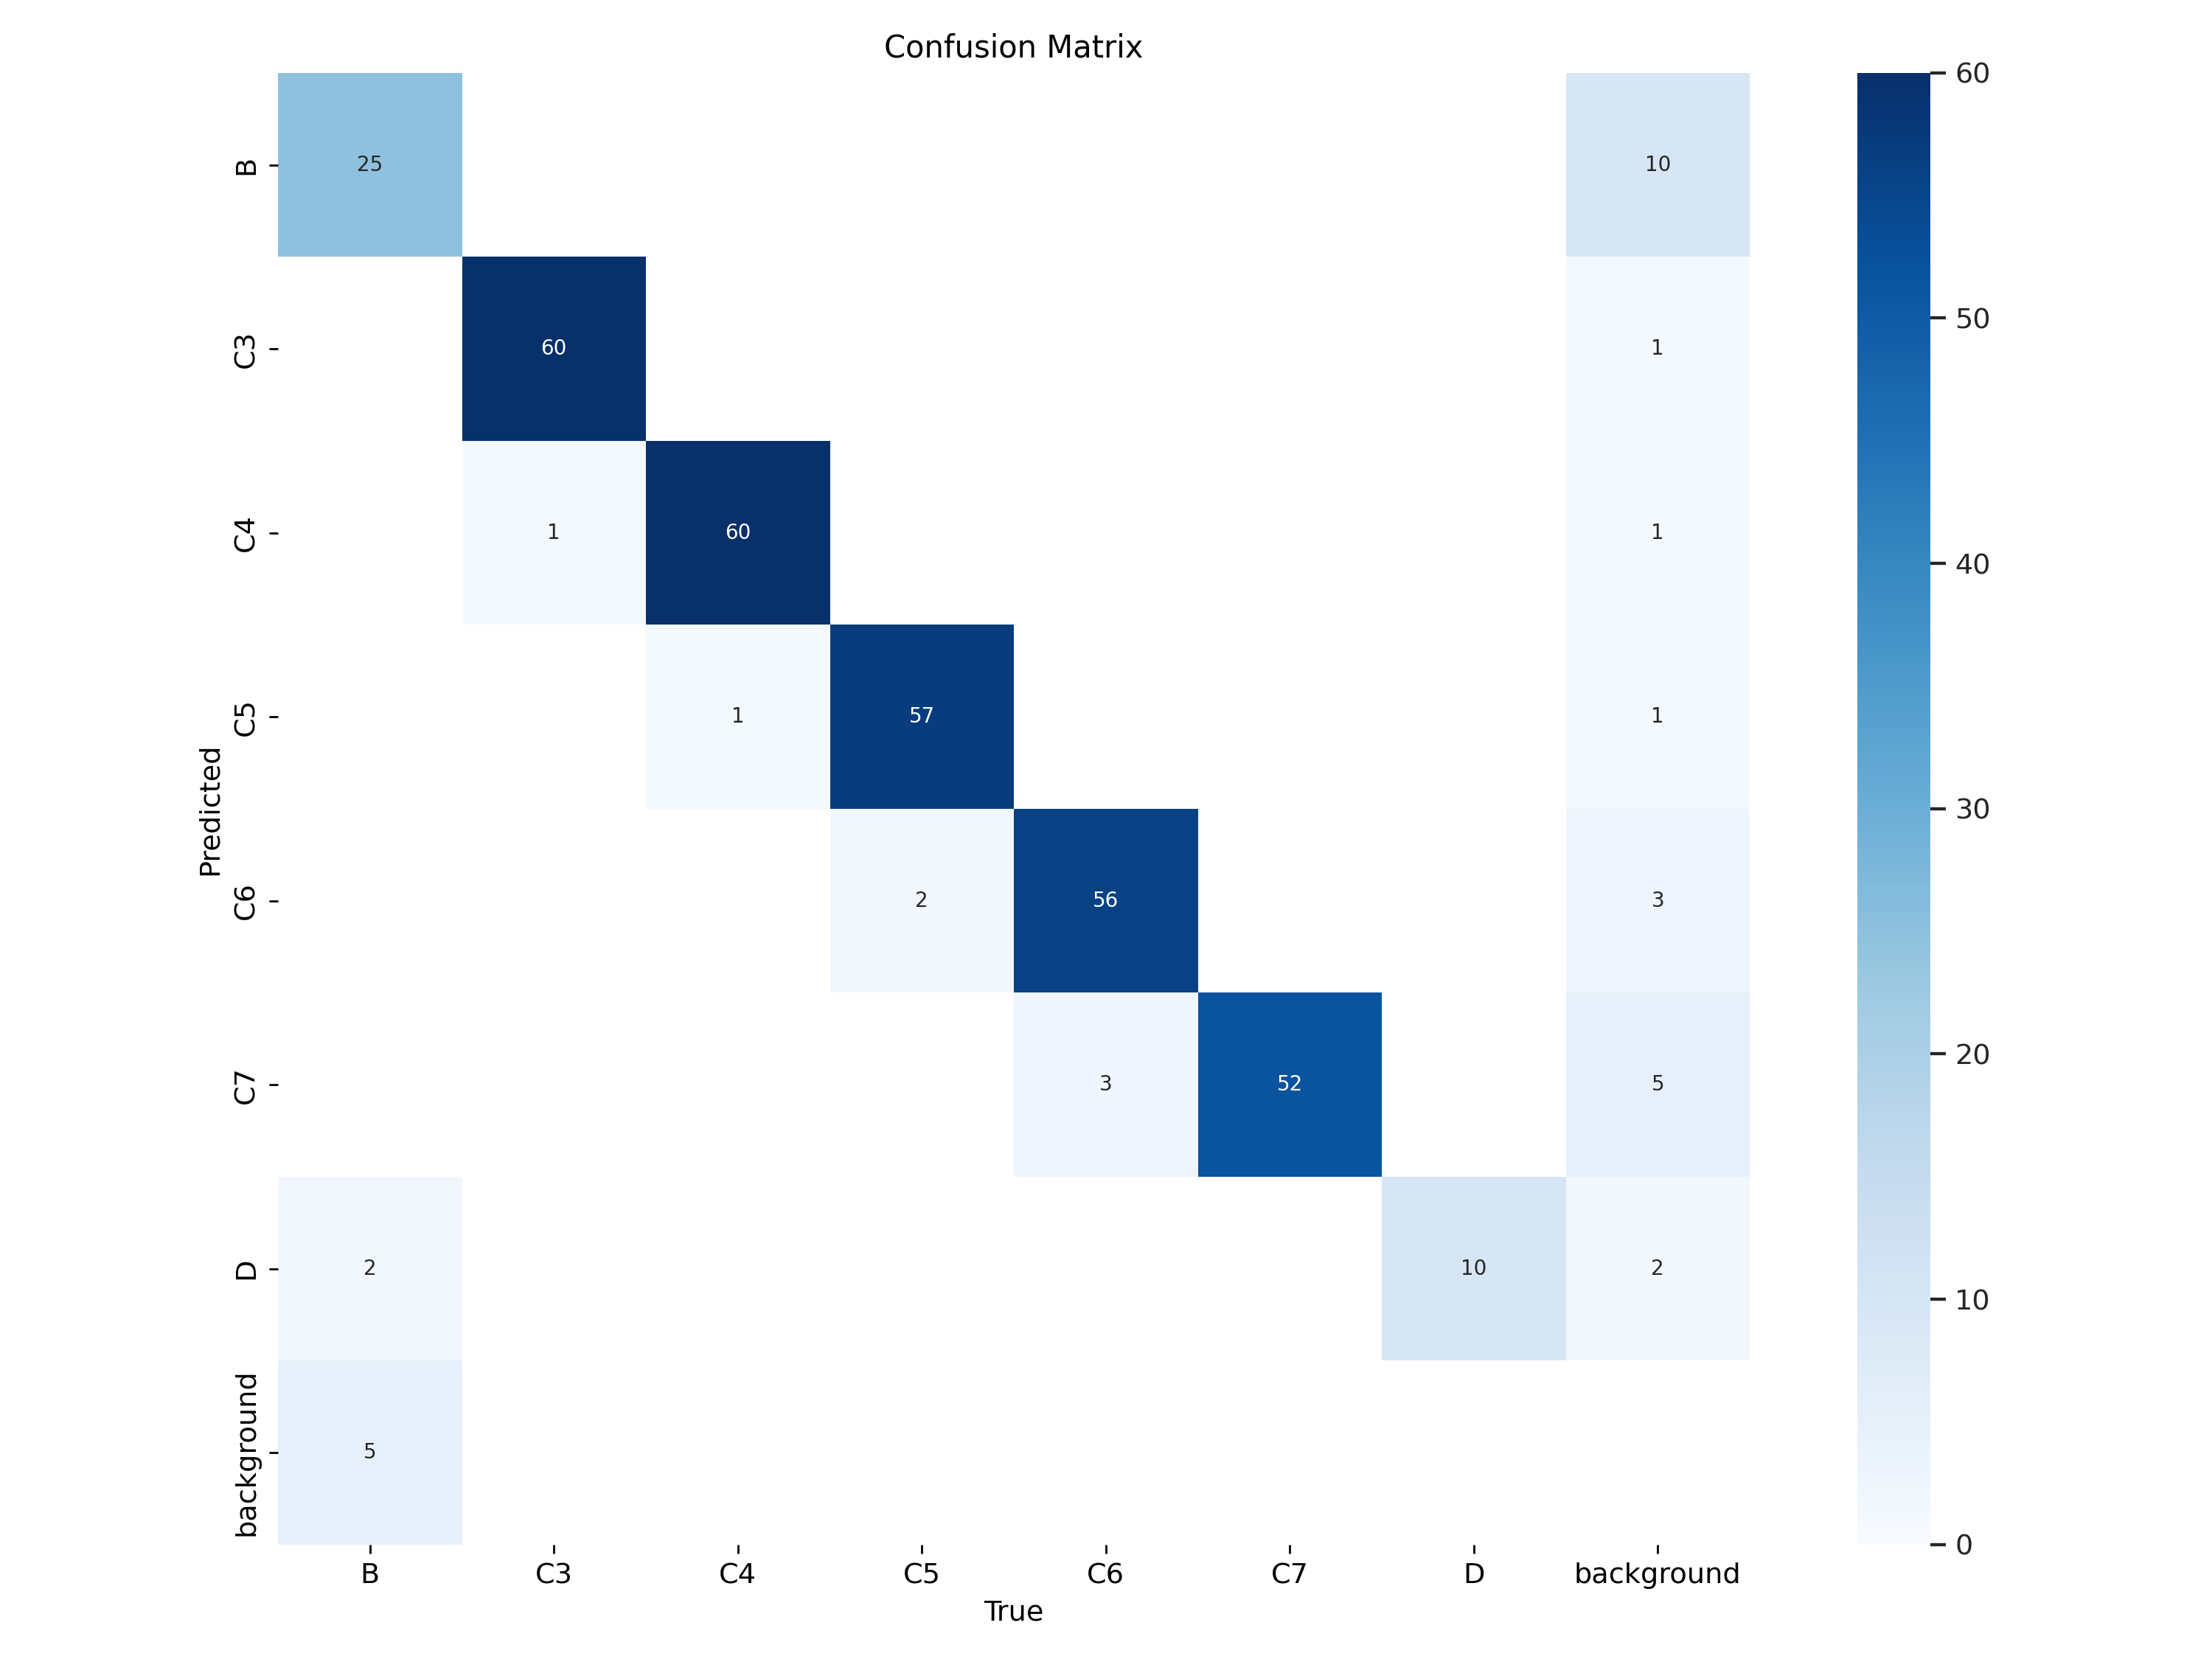

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

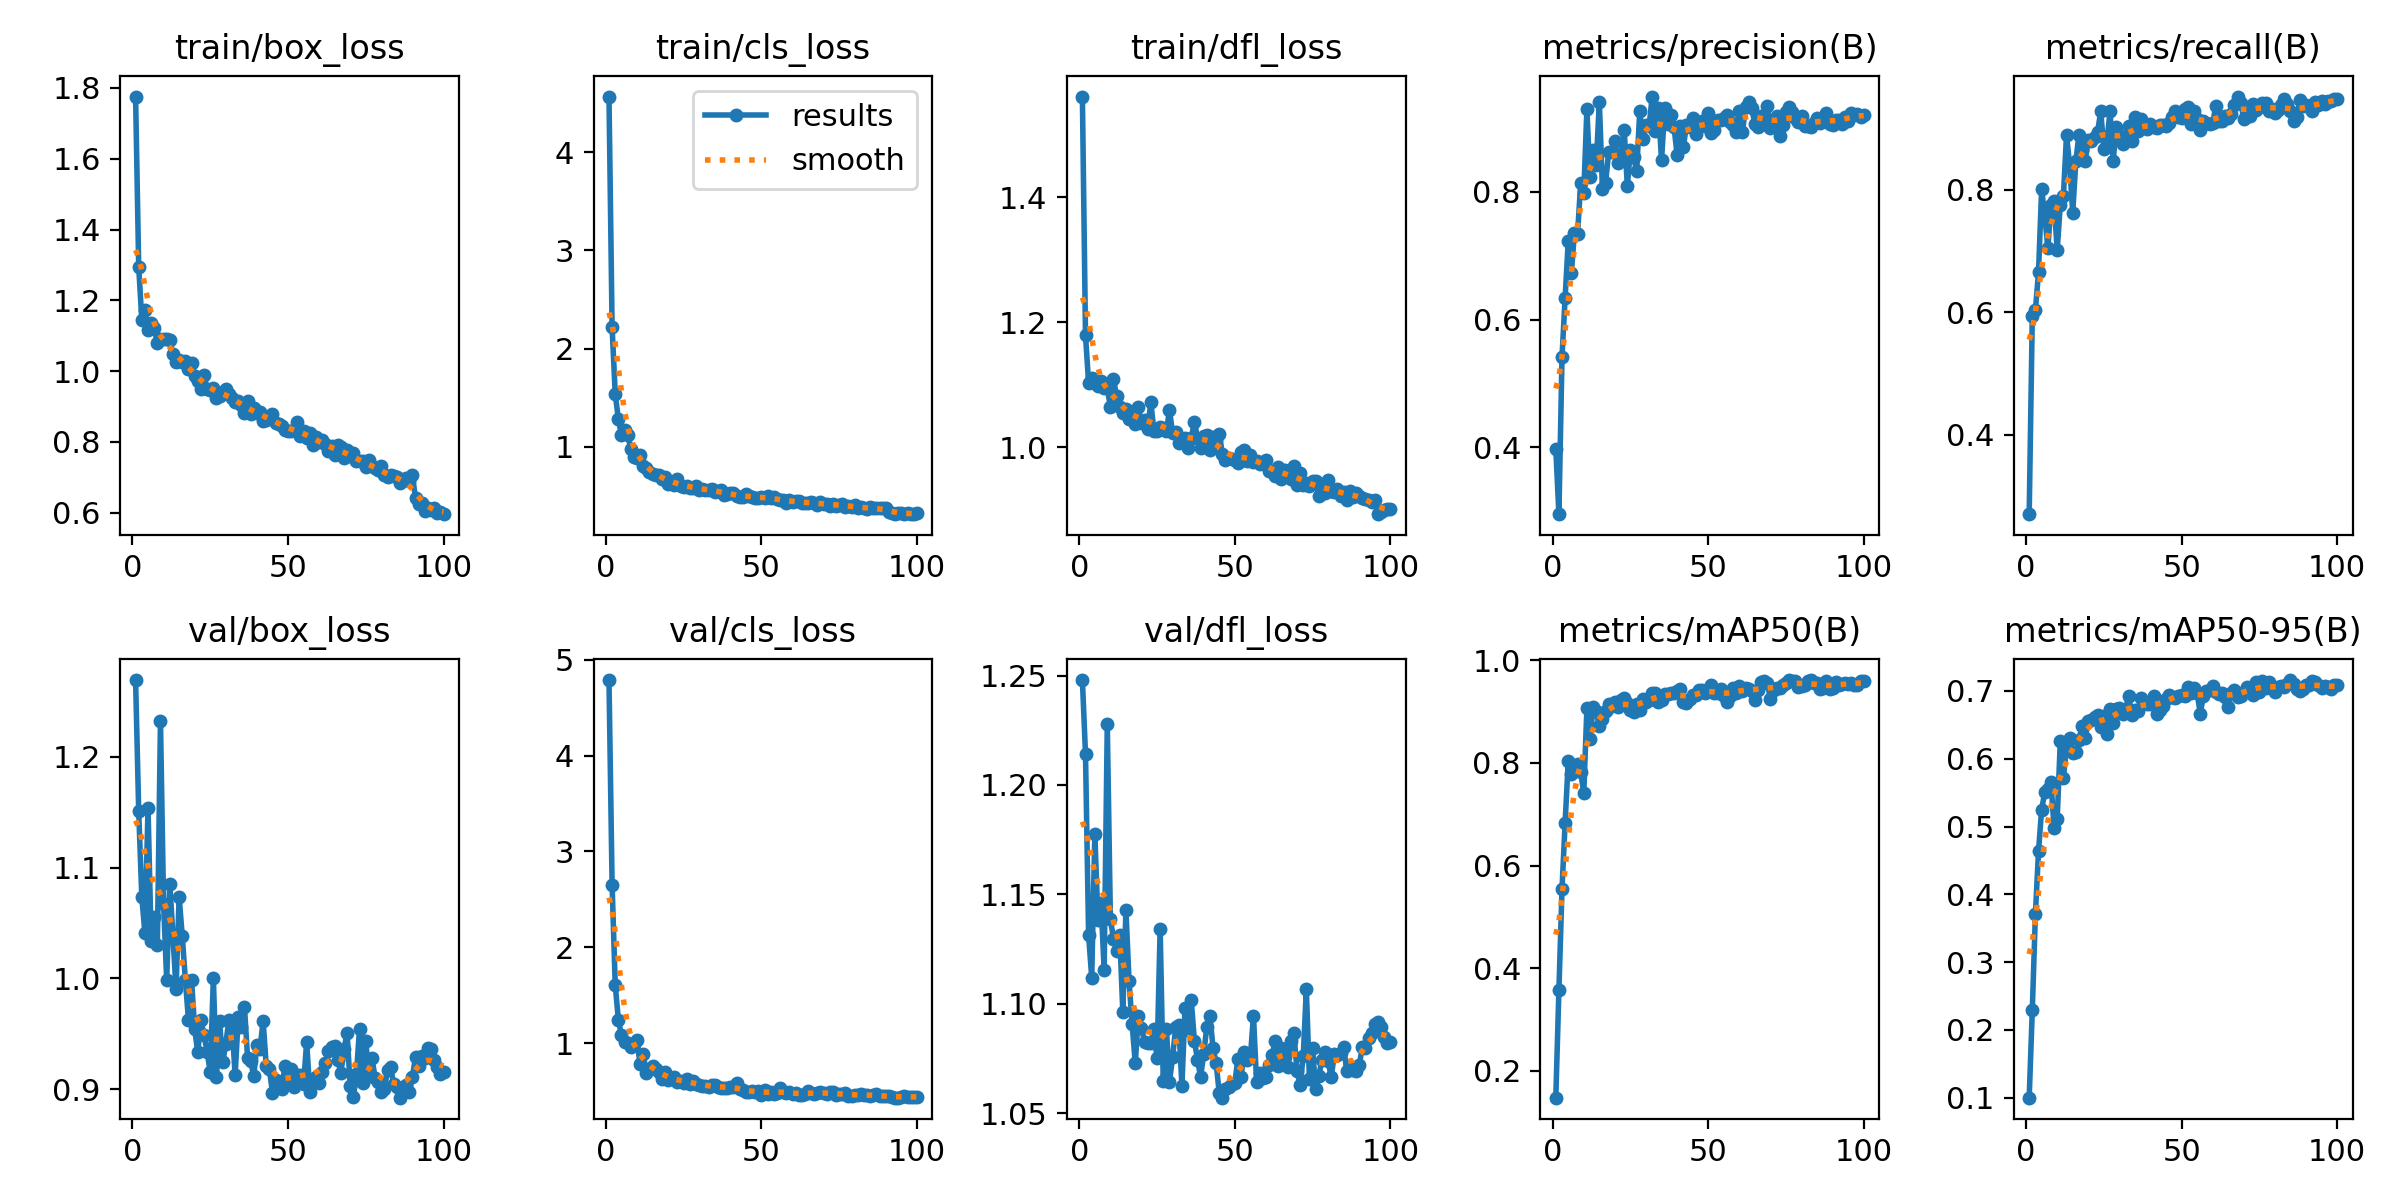

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

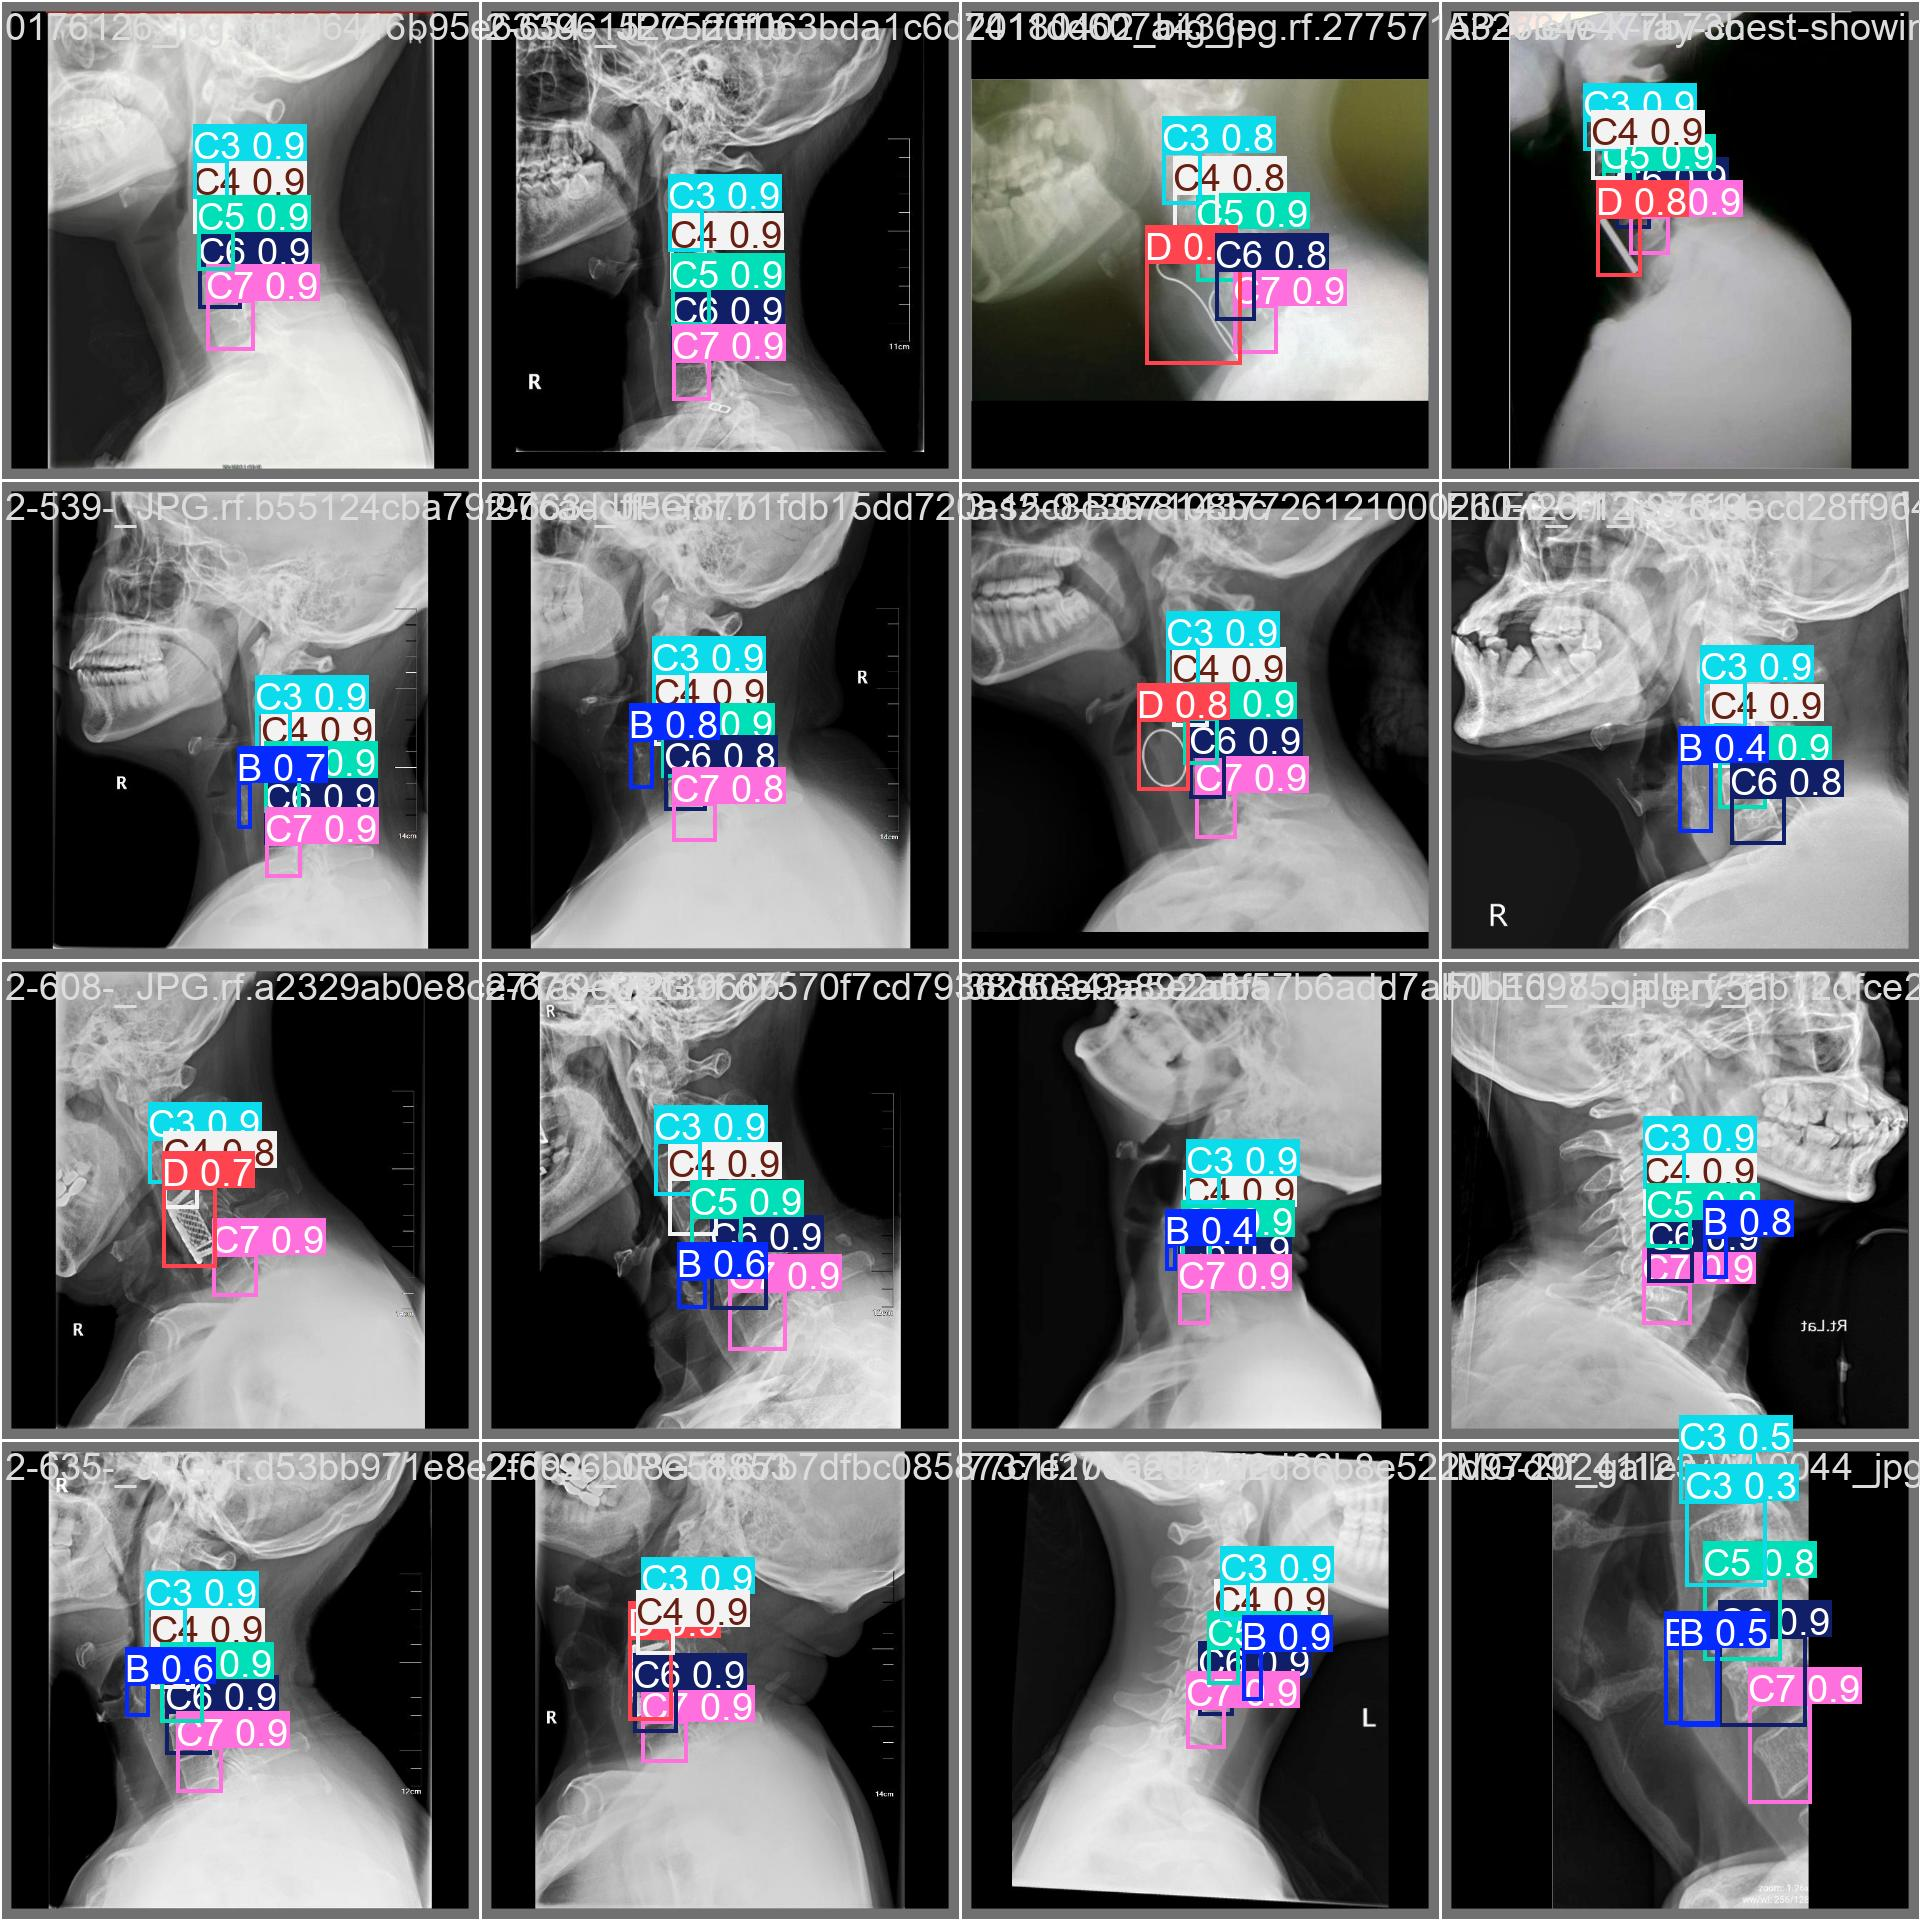

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [14]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/lateral-neck-11/valid/labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100% 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.49it/s]
                   all         61        334      0.914      0.928      0.957      0.718
                     B         31         32      0.845      0.656      0.781      0.374
                    C3         61         61      0.988      0.967      0.995      0.793
                    C4         61         61      0.967       0.97      0.993      0.808
                    C5         59         59      0.977      0.966      0.986      0.799
                    C6         59         59       0.95      0.958      0.981      0.806
                    C7         52        

In [15]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.39 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,415,509 parameters, 0 gradients, 21.3 GFLOPs

image 1/30 /content/datasets/lateral-neck-11/test/images/0461138_jpg.rf.3c6232e02b1640373cd256b64190c8bd.jpg: 640x640 1 B, 1 C3, 1 C4, 1 C5, 1 C6, 1 C7, 20.8ms
image 2/30 /content/datasets/lateral-neck-11/test/images/0567139_jpg.rf.f45c27e487efc4a299287c0b394dc4bf.jpg: 640x640 1 B, 1 C3, 1 C4, 1 C5, 1 C6, 1 C7, 15.6ms
image 3/30 /content/datasets/lateral-neck-11/test/images/0939024_jpg.rf.9388a0837c38f18a603b6079b0031aab.jpg: 640x640 1 C3, 1 C4, 1 C5, 1 C6, 1 C7, 15.6ms
image 4/30 /content/datasets/lateral-neck-11/test/images/1-108-_JPG.rf.3943f80f4e6493cf3b5f15fa11b1be21.jpg: 640x640 1 C3, 1 C4, 1 C5, 1 C6, 1 C7, 15.5ms
image 5/30 /content/datasets/lateral-neck-11/test/images/1-125-_JPG.rf.d9dd53839c5e8a980a332506bbad3617.jpg: 640x640 1 B, 1 C3, 1 C4, 1 C5, 1 C6, 1 C7, 15.5ms
image 6/30 /content/datasets/lateral-neck-11/

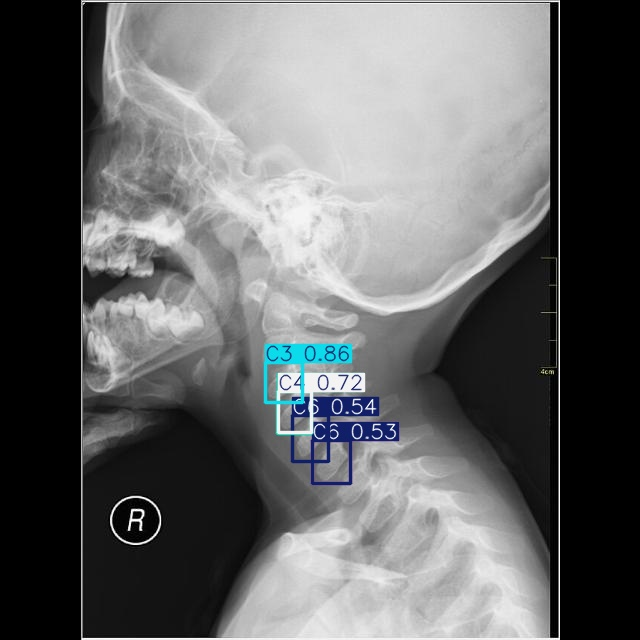

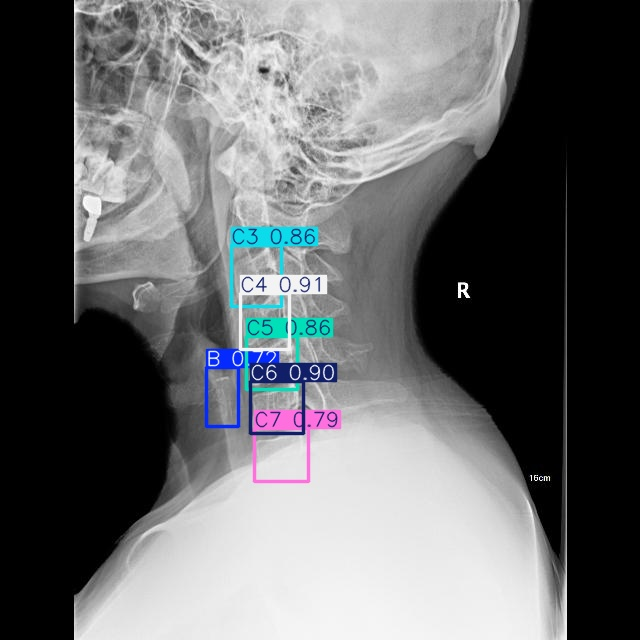

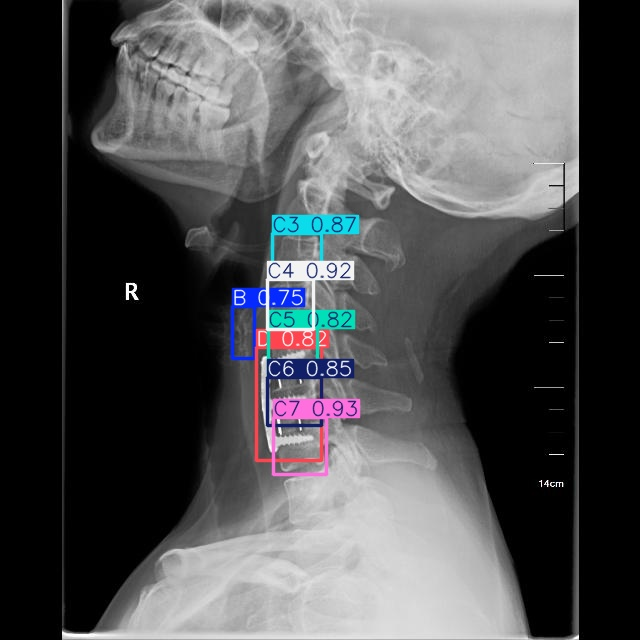

In [16]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [17]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/pasan-7ygjw/lateral-neck/11
Share your model with the world at: https://universe.roboflow.com/pasan-7ygjw/lateral-neck/model/11


In [18]:
!pip install inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.5/880.5 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [19]:
from google.colab import files
import shutil

# Zip the 'runs' folder
shutil.make_archive('runs', 'zip', 'runs')

# Download the zip file
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>